In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd gdrive/My Drive/app

/content/gdrive/My Drive/app


In [0]:
!git clone https://github.com/Callmewuxin/fish_classification.git

Cloning into 'fish_classification'...
remote: Enumerating objects: 27086, done.
remote: Counting objects: 100% (27086/27086), done.
remote: Compressing objects: 100% (27085/27085), done.
remote: Total 27086 (delta 0), reused 27086 (delta 0), pack-reused 0
Receiving objects: 100% (27086/27086), 437.02 MiB | 12.83 MiB/s, done.
Checking out files: 100% (27370/27370), done.


In [0]:
cd fish_classification

/content/gdrive/My Drive/app/fish_classification


CNN_SENet

W0705 15:16:34.102907 139938170943360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


W0705 15:16:35.157096 139938170943360 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0705 15:16:35.291539 139938170943360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 196, 196, 32) 2432        input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 196, 196, 32) 128         conv2d_7[0][0]                   
__________________________________________________________________________________________________
global_average_pooling2d_6 (Glo (None, 32)           0           batch_normalization_7[0][0]      
__________________________________________________________________________________________________
reshape_6 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:144: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:144: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=1710, validation_steps=512, class_weight="auto", callbacks=[<keras.ca..., epochs=50)`
W0705 15:16:38.441171 139938170943360 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is depreca

Found 8200 images belonging to 23 classes.
Epoch 1/50
1710/1710 [==============================] - 234s 137ms/step - loss: 1.0019 - acc: 0.8376 - val_loss: 0.3395 - val_acc: 0.9539

Epoch 00001: val_acc improved from -inf to 0.95386, saving model to CNN_SENet.h5
Epoch 2/50
1710/1710 [==============================] - 231s 135ms/step - loss: 0.3756 - acc: 0.9299 - val_loss: 0.2642 - val_acc: 0.9569

Epoch 00002: val_acc improved from 0.95386 to 0.95687, saving model to CNN_SENet.h5
Epoch 3/50
1710/1710 [==============================] - 226s 132ms/step - loss: 0.2301 - acc: 0.9527 - val_loss: 0.0888 - val_acc: 0.9785

Epoch 00003: val_acc improved from 0.95687 to 0.97849, saving model to CNN_SENet.h5
Epoch 4/50
1710/1710 [==============================] - 228s 133ms/step - loss: 0.1523 - acc: 0.9671 - val_loss: 0.0812 - val_acc: 0.9848

Epoch 00004: val_acc improved from 0.97849 to 0.98485, saving model to CNN_SENet.h5
Epoch 5/50
1710/1710 [==============================] - 227s 133ms/s

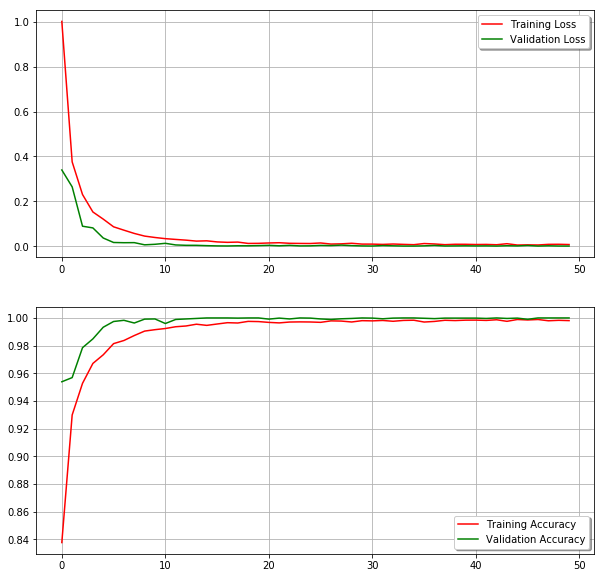

In [0]:
import keras
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, Convolution2D, Permute, Reshape, multiply, add, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
import keras.backend as K
from keras.callbacks import ModelCheckpoint
import os
import matplotlib.pyplot as plt

c = 23
# se-block
def squeeze_excite_block(input, ratio=16):
    init = input
    filters = int(init.shape[-1])
    print(type(filters))
    se_shape = (1, 1, filters)
    res = int(filters // ratio)
    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(res, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)


    x = multiply([init, se])
    return x

# input
input_data = Input(shape=[200, 200, 3])
# first layer
conv1 = Convolution2D(filters=32, kernel_size=[5, 5])(input_data)
BN1 = BatchNormalization()(conv1)
se1 = squeeze_excite_block(BN1)
ac1 = Activation('relu')(se1)
pool1 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac1)

# second layer
conv2 = Convolution2D(filters=64, kernel_size=[3, 3])(pool1)
BN2 = BatchNormalization()(conv2)
se2 = squeeze_excite_block(BN2)
ac2 = Activation('relu')(se2)
pool2 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac2)

# third layer
conv3 = Convolution2D(filters=64, kernel_size=[3, 3])(pool2)
BN3 = BatchNormalization()(conv3)
se3 = squeeze_excite_block(BN3)
ac3 = Activation('relu')(se3)
pool3 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac3)

# forth layer
conv4 = Convolution2D(filters=128, kernel_size=[2, 2])(pool3)
BN4 = BatchNormalization()(conv4)
se4 = squeeze_excite_block(BN4)
ac4 = Activation('relu')(se4)
pool4 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac4)

# fifth layer
conv5 = Convolution2D(filters=256, kernel_size=[2, 2])(pool4)
BN5 = BatchNormalization()(conv5)
se5 = squeeze_excite_block(BN5)
ac5 = Activation('relu')(se5)
pool5 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac5)

# flatten
flatten = Flatten()(pool5)

# fc1
fc1 = Dense(units=256)(flatten)
fc_bn1 = BatchNormalization()(fc1)
fc_ac1 = Activation('relu')(fc_bn1)

# fc2
fc2 = Dense(units=128)(fc_ac1)
fc_bn2 = BatchNormalization()(fc2)
fc_ac2 = Activation('relu')(fc_bn2)
dp = Dropout(0.5)(fc_ac2)

# fc3
fc3 = Dense(units=c)(dp)
fc_bn3 = BatchNormalization()(fc3)
output = Activation('softmax')(fc_bn3)

model = Model(inputs=input_data, outputs=output)

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# prepare data
train_dir = 'fish_image'  # 训练集数据


nb_epoches = int(50)                # epoch数量
batch_size = int(16)





#　图片生成器
train_datagen = ImageDataGenerator(rescale=1./255)
#validation_split=0.3 可以通过设置validation_split只从train文件中提取训练集和验证集（1）
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)


# In[7]:


# 训练数据与测试数据
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')#subset='training'，假如设置了（1），可以通过设置subset来分配训练集和验证集

valid_generator = valid_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')#subset='validation'

# checkpoint
filepath = "CNN_SENet.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
if os.path.exists(filepath):
    model.load_weights(filepath)
    # 若成功加载前面保存的参数，输出下列信息
    print("checkpoint_loaded")


history_tl = model.fit_generator(
train_generator,
nb_epoch=nb_epoches,
validation_data=valid_generator,
steps_per_epoch= STEP_SIZE_TRAIN,
validation_steps = STEP_SIZE_VALID,
class_weight='auto',
callbacks=callbacks_list)

# draw result
fig, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(history_tl.history['loss'], color='r', label='Training Loss')
ax[0].plot(history_tl.history['val_loss'], color='g', label='Validation Loss')
ax[0].legend(loc='best',shadow=True)
ax[0].grid(True)

ax[1].plot(history_tl.history['acc'], color='r', label='Training Accuracy')
ax[1].plot(history_tl.history['val_acc'], color='g', label='Validation Accuracy')
ax[1].legend(loc='best',shadow=True)
ax[1].grid(True)
plt.savefig("result+"+str(nb_epoches)+".png")
plt.show()


In [1]:
ls

sample_data/


In [4]:
ls

cloudNet/
cloud-recognition/
DCGAN-Music-Generation/
fish_classification/
Forest-Fire-Detection-through-UAV-imagery-using-CNNs/
keras-alzheimers-3d-conv/
model.h5
newspapers-clustering/
OHR-master/
simple_keras_api/
UCLA-BE188-Meyer-2018-Winter-Final-Project/


In [5]:
cd fish_classification

/content/gdrive/My Drive/app/fish_classification


In [6]:
!git remote -v

origin	https://github.com/Callmewuxin/fish_classification.git (fetch)
origin	https://github.com/Callmewuxin/fish_classification.git (push)


In [7]:
!git add -A

fatal: Unable to create '/content/gdrive/My Drive/app/fish_classification/.git/index.lock': File exists.

Another git process seems to be running in this repository, e.g.
an editor opened by 'git commit'. Please make sure all processes
are terminated then try again. If it still fails, a git process
may have crashed in this repository earlier:
remove the file manually to continue.


In [0]:
!rm -rf .git

In [9]:
!git init

Initialized empty Git repository in /content/gdrive/My Drive/app/fish_classification/.git/


In [10]:
!git add -A

KeyboardInterrupt: ignored

In [11]:
ls

CNN_SENet.h5  fish_classification.ipynb  fish_image/  result+50.png


In [0]:
!git add -A

In [0]:
!git remote add origin https://github.com/Callmewuxin/fish_classification.git

In [15]:
!git push -u origin master

error: src refspec master does not match any.
error: failed to push some refs to 'https://github.com/Callmewuxin/fish_classification.git'


In [16]:
!git commit -m "CCSN_SENet"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@4a9d5d963d6f.(none)')


In [0]:
!git config --global user.email "13917014482@163.com"

In [0]:
!git config --global user.name "Callmewuxin"

In [19]:
!git commit -m "CCSN_SENet"

[master (root-commit) b71461f] CCSN_SENet
 4 files changed, 2 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 CNN_SENet.h5
 create mode 100644 fish_classification.ipynb
 create mode 100644 result+50.png


In [20]:
!git push -u origin master

fatal: could not read Username for 'https://github.com': No such device or address


In [21]:
!git remote add origin https://github.com/Callmewuxin/fish_classification.git

fatal: remote origin already exists.


In [22]:
!git push -u origin master

fatal: could not read Username for 'https://github.com': No such device or address


In [0]:
!git config --global user.email "13917014482@163.com"

In [0]:
!git config --global user.name "Callmewuxin"